# Analytics Vidhya Job-A-Thon 

In [676]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [677]:
df2 = pd.read_csv('test_YCcRUnU.csv')
df2.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0
21804,72687,C2,3617,Owned,Individual,73,73,No,X2,14+,2.0,3,23040.0


In [678]:
df2.shape

(21805, 13)

# Loading the Train Data

In [825]:
dfff = pd.read_csv('train_Df64byy.csv')
dfff.shape

(50882, 14)

In [679]:
df = pd.read_csv('train_Df64byy.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Checking the dataset is balanced or not?

<AxesSubplot:xlabel='Response', ylabel='count'>

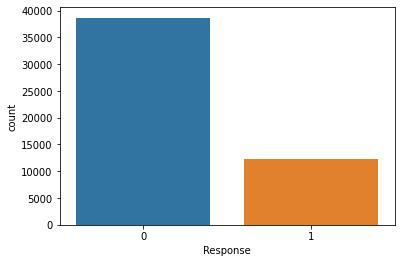

In [680]:
sns.countplot(x='Response', data=df)

### Checking for the missing values in the whole train dataset

In [681]:

np.round(df.isnull().mean(), 2).sort_values() ## checking the % of missing values

ID                         0.00
City_Code                  0.00
Region_Code                0.00
Accomodation_Type          0.00
Reco_Insurance_Type        0.00
Upper_Age                  0.00
Lower_Age                  0.00
Is_Spouse                  0.00
Reco_Policy_Cat            0.00
Reco_Policy_Premium        0.00
Response                   0.00
Health Indicator           0.23
Holding_Policy_Duration    0.40
Holding_Policy_Type        0.40
dtype: float64

# EDA and observing each and every column

Here we will go through each and every column and observe and do feature engineering

### City_Code 

In [682]:
df['City_Code'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [683]:
### removing the C character from the city code column and making it as int column
df['City_Code'] = df['City_Code'].str.split('C', expand=True)[1]

In [684]:
df['City_Code'].dtype

dtype('O')

In [685]:
df['City_Code'] = df['City_Code'].astype(int)
df['City_Code'].dtype

dtype('int32')

In [686]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Region_Code 

It is a discrete numerical variable

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

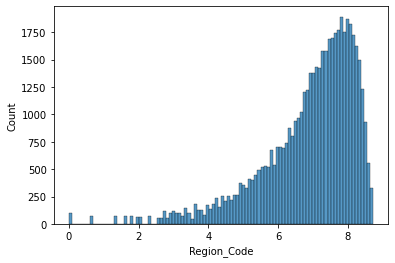

In [687]:
sns.histplot(np.log(df['Region_Code']))

In [688]:
### Checking the distribution of the Region_Code column and looking for the best transformation

np.log(df['Region_Code']).mean(), np.log(df['Region_Code']).median()  

(6.887818913152858, 7.237778191923443)

In [689]:
np.sqrt(df['Region_Code']).mean(), np.sqrt(df['Region_Code']).median()

(37.39026274378287, 37.296112397943034)

In [690]:
#### Scaling down the features

df['Region_Code']=np.sqrt(df['Region_Code'])

In [691]:
df['Region_Code']

0        56.683331
1        33.421550
2        61.090097
3        66.166457
4        46.797436
           ...    
50877    29.068884
50878    64.714759
50879    21.023796
50880     2.000000
50881    62.177166
Name: Region_Code, Length: 50882, dtype: float64

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

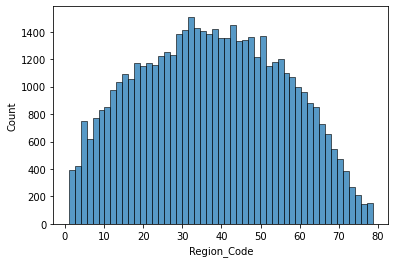

In [692]:
sns.histplot(df['Region_Code'])

### Accomodation_Type

It is a categorical variable with 2 categories

In [693]:

df['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

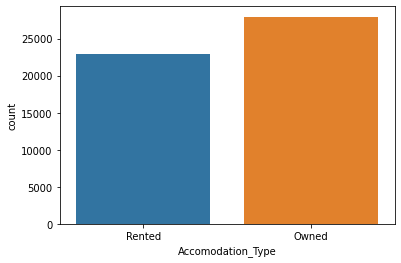

In [694]:
sns.countplot(x='Accomodation_Type', data=df)

In [695]:
df.groupby(['Accomodation_Type'])['Response'].value_counts()

Accomodation_Type  Response
Owned              0           21188
                   1            6763
Rented             0           17485
                   1            5446
Name: Response, dtype: int64

In [696]:
#### Doing One Hot encoding 

df = pd.concat([df, pd.get_dummies(df['Accomodation_Type'], drop_first=True) ], axis=1)
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented
0,1,3,56.683331,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,1
1,2,5,33.421550,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,0
2,3,5,61.090097,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,0
3,4,24,66.166457,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,0
4,5,8,46.797436,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,1


In [697]:
#### Dropping the column

df = df.drop(['Accomodation_Type'], axis=1)

In [698]:
df.head()

,ID,City_Code,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented
0,1,3,56.683331,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,1
1,2,5,33.421550,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,0
2,3,5,61.090097,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,0
3,4,24,66.166457,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,0
4,5,8,46.797436,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,1


### Reco_Insurance_Type

It is a categorical variable with 2 categories!!

In [699]:
df['Reco_Insurance_Type'].unique()

array(['Individual', 'Joint'], dtype=object)

In [700]:
df.groupby(['Reco_Insurance_Type'])['Response'].value_counts()

Reco_Insurance_Type  Response
Individual           0           30896
                     1            9640
Joint                0            7777
                     1            2569
Name: Response, dtype: int64

In [701]:
#### Doing One Hot Encoding 

df = pd.concat([df, pd.get_dummies(df['Reco_Insurance_Type'], drop_first=True)], axis=1)
df.head()

,ID,City_Code,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint
0,1,3,56.683331,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,1,0
1,2,5,33.421550,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,0,1
2,3,5,61.090097,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,0,0
3,4,24,66.166457,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,0,1
4,5,8,46.797436,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,1,0


In [702]:
#### Dropping this column after doing the one hot encoding


df.drop(['Reco_Insurance_Type'],axis=1, inplace=True)

In [703]:
df.head(2)

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint
0,1,3,56.683331,36,36,No,X1,14+,3.0,22,11628.0,0,1,0
1,2,5,33.421550,75,22,No,X2,NaN,NaN,22,30510.0,0,0,1


### Upper_Age & Lower_Age

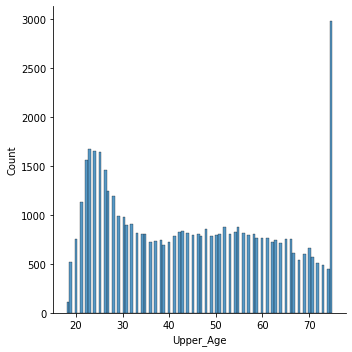

In [704]:
sns.displot(x='Upper_Age', data=df, bins=100)

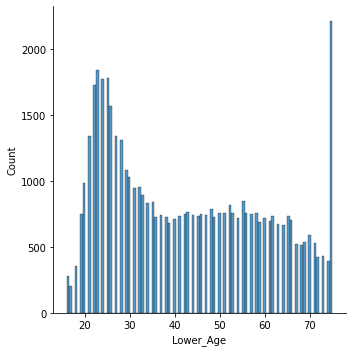

In [705]:
sns.displot(x='Lower_Age', data=df, bins=100)

In [706]:
ser = (df['Upper_Age'] + df['Lower_Age'])//2

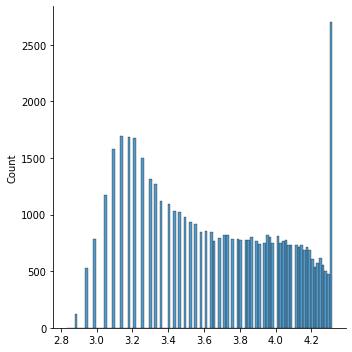

In [707]:
sns.displot(np.log(ser), bins=100)

In [708]:
ser.unique()

array([36, 48, 32, 50, 44, 52, 28, 74, 47, 42, 21, 53, 66, 20, 27, 34, 43,
       55, 23, 18, 22, 25, 24, 37, 56, 35, 63, 64, 67, 75, 71, 70, 31, 19,
       65, 26, 54, 33, 30, 69, 68, 29, 62, 72, 58, 39, 60, 57, 41, 40, 61,
       45, 51, 38, 59, 49, 46, 73, 17], dtype=int64)

In [655]:
df[df['Upper_Age']==74]['Lower_Age'].value_counts()[:5]

74    286
73     30
71     25
72     17
70     15
Name: Lower_Age, dtype: int64

In [656]:

df['Upper_Age'].value_counts().sort_values()[:5]

18    116
74    446
73    492
72    512
19    515
Name: Upper_Age, dtype: int64

In [657]:
df['Lower_Age'].value_counts().sort_values()[:5]

17    206
16    283
18    359
74    395
72    420
Name: Lower_Age, dtype: int64

**So I observed that Upper_Age and Lower_Age are quite same most of the time.... the difference between them is very less ... so lets take the mean of both the column and round it off and make a single column**

In [709]:
df['Age'] = (df['Upper_Age'] + df['Lower_Age'])//2

In [710]:
df.drop(['Upper_Age','Lower_Age'], axis=1, inplace=True)

In [711]:
df.head()

,ID,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age
0,1,3,56.683331,No,X1,14+,3.0,22,11628.0,0,1,0,36
1,2,5,33.421550,No,X2,NaN,NaN,22,30510.0,0,0,1,48
2,3,5,61.090097,No,NaN,1.0,1.0,19,7450.0,1,0,0,32
3,4,24,66.166457,No,X1,14+,3.0,19,17780.0,0,0,1,50
4,5,8,46.797436,No,X2,3.0,1.0,16,10404.0,0,1,0,44


### Is_Spouse

Its a Categorical column with only 2 categories(Yes/No)

In [712]:
df.groupby(['Is_Spouse'])['Response'].value_counts()

Is_Spouse  Response
No         0           32303
           1           10157
Yes        0            6370
           1            2052
Name: Response, dtype: int64

In [713]:
df['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [714]:
#### Doing One Hot Encoding on this column

df = pd.concat([df, pd.get_dummies(df['Is_Spouse'], drop_first=True)], axis=1)
df.head()

,ID,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Yes
0,1,3,56.683331,No,X1,14+,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,No,X2,NaN,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,No,NaN,1.0,1.0,19,7450.0,1,0,0,32,0
3,4,24,66.166457,No,X1,14+,3.0,19,17780.0,0,0,1,50,0
4,5,8,46.797436,No,X2,3.0,1.0,16,10404.0,0,1,0,44,0


In [715]:
df.rename(columns={'Yes' : 'Is_Spouse_Yes'}, inplace=True)
df.head()

,ID,City_Code,Region_Code,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
0,1,3,56.683331,No,X1,14+,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,No,X2,NaN,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,No,NaN,1.0,1.0,19,7450.0,1,0,0,32,0
3,4,24,66.166457,No,X1,14+,3.0,19,17780.0,0,0,1,50,0
4,5,8,46.797436,No,X2,3.0,1.0,16,10404.0,0,1,0,44,0


In [716]:
df.drop(['Is_Spouse'], axis=1, inplace=True)
df.head()

,ID,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
0,1,3,56.683331,X1,14+,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,X2,NaN,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,NaN,1.0,1.0,19,7450.0,1,0,0,32,0
3,4,24,66.166457,X1,14+,3.0,19,17780.0,0,0,1,50,0
4,5,8,46.797436,X2,3.0,1.0,16,10404.0,0,1,0,44,0


### Health_Indicator

Its a Ordinal Categorical feature

In [717]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [719]:
df['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [720]:
df['Health Indicator'].dtype

dtype('O')

In [721]:
df.groupby(['Health Indicator'])['Response'].mean()

Health Indicator
X1    0.244120
X2    0.241096
X3    0.236469
X4    0.243079
X5    0.236248
X6    0.239844
X7    0.316327
X8    0.230769
X9    0.222222
Name: Response, dtype: float64

In [722]:
df2 = df.copy() ### creating df2 and saving for future reference!!

In [723]:
df.head()

,ID,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
0,1,3,56.683331,X1,14+,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,X2,NaN,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,NaN,1.0,1.0,19,7450.0,1,0,0,32,0
3,4,24,66.166457,X1,14+,3.0,19,17780.0,0,0,1,50,0
4,5,8,46.797436,X2,3.0,1.0,16,10404.0,0,1,0,44,0


In [410]:
# df2['Health Indicator'] = df['Health Indicator'].fillna('Missing')

In [724]:
df2.head()

,ID,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
0,1,3,56.683331,X1,14+,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,X2,NaN,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,NaN,1.0,1.0,19,7450.0,1,0,0,32,0
3,4,24,66.166457,X1,14+,3.0,19,17780.0,0,0,1,50,0
4,5,8,46.797436,X2,3.0,1.0,16,10404.0,0,1,0,44,0


In [421]:
df2.groupby(['Health Indicator'])['Response'].value_counts()#[2:4]

Health Indicator  Response
Missing           0           8953
                  1           2738
X1                0           9834
                  1           3176
X2                0           7841
                  1           2491
X3                0           5163
                  1           1599
X4                0           4347
                  1           1396
X5                0           1319
                  1            408
X6                0            973
                  1            307
X7                0            134
                  1             62
X8                0             60
                  1             18
X9                0             49
                  1             14
Name: Response, dtype: int64

In [725]:
df['Health Indicator'].isnull().sum()

11691

In [726]:
df[df['Health Indicator'].isna()]

,ID,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
2,3,5,61.090097,NaN,1.0,1.0,19,7450.0,1,0,0,32,0
6,7,3,26.057628,NaN,NaN,NaN,17,10640.0,0,0,0,28,0
9,10,1,23.021729,NaN,7.0,4.0,18,21100.8,1,0,1,42,1
12,13,7,58.762233,NaN,1.0,2.0,20,17192.0,1,0,0,66,0
19,20,20,31.192948,NaN,NaN,NaN,4,8050.0,0,0,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,50860,1,14.730920,NaN,6.0,3.0,20,19448.0,0,0,0,70,0
50865,50866,21,70.107061,NaN,NaN,NaN,14,19944.0,0,0,0,74,0
50869,50870,11,42.071368,NaN,1.0,1.0,20,10944.0,0,1,0,45,0
50871,50872,10,14.966630,NaN,1.0,1.0,13,11840.0,0,1,0,21,0


In [727]:
df[~df['Health Indicator'].isna()].shape

(39191, 13)

In [728]:
df2['Health Indicator'].mode()[0]

'X1'

In [449]:
# df2.fillna(df2['Health Indicator'].mode()[0], inplace=True)

### Filling this categorical column with the most frequent occurring category

In [729]:
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace=True)

In [730]:
df.head()

,ID,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
0,1,3,56.683331,X1,14+,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,X2,NaN,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,X1,1.0,1.0,19,7450.0,1,0,0,32,0
3,4,24,66.166457,X1,14+,3.0,19,17780.0,0,0,1,50,0
4,5,8,46.797436,X2,3.0,1.0,16,10404.0,0,1,0,44,0


In [731]:
df2['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [732]:
df['Health Indicator'] = df['Health Indicator'].str.split('X',expand=True)[1]

In [849]:
df['Health Indicator'] = df['Health Indicator'].astype(int)

In [733]:
df['Health Indicator'].value_counts()

1    24701
2    10332
3     6762
4     5743
5     1727
6     1280
7      196
8       78
9       63
Name: Health Indicator, dtype: int64

### Holding_Policy_Duration

In [734]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [740]:
df.groupby(['Holding_Policy_Duration'])['Response'].value_counts()

Holding_Policy_Duration  Response
1.0                      0           3502
                         1            997
10.0                     0            591
                         1            222
11.0                     0            409
                         1            137
12.0                     0            383
                         1            130
13.0                     0            373
                         1            138
14+                      0           3248
                         1           1087
14.0                     0            351
                         1            115
2.0                      0           3249
                         1           1011
3.0                      0           2754
                         1            832
4.0                      0           2104
                         1            667
5.0                      0           1799
                         1            563
6.0                      0           1449


Taking the most Frequent Category first

In [741]:
df['Holding_Policy_Duration'].mode()[0]

'1.0'

In [742]:
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace=True)

In [743]:
df['Holding_Policy_Duration'].replace({'14+' : 14.0}, inplace=True)

In [744]:
df['Holding_Policy_Duration'].value_counts()

1.0     24750
14.0     4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [746]:
df['Holding_Policy_Duration'].dtype

dtype('O')

In [747]:
df['Holding_Policy_Duration'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '14.0'

In [748]:

df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'],downcast='integer')


In [749]:

df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(int)
df['Holding_Policy_Duration']

0        14
1         1
2         1
3        14
4         3
         ..
50877     1
50878     7
50879    14
50880     2
50881     2
Name: Holding_Policy_Duration, Length: 50882, dtype: int32

In [750]:
df['Holding_Policy_Duration'].dtype

dtype('int32')

In [751]:
df.head(3)

,ID,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age,Is_Spouse_Yes
0,1,3,56.683331,1,14,3.0,22,11628.0,0,1,0,36,0
1,2,5,33.421550,2,1,NaN,22,30510.0,0,0,1,48,0
2,3,5,61.090097,1,1,1.0,19,7450.0,1,0,0,32,0


### Holding_Policy_Type

This is a Categorical variable with 4 categories

In [752]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [753]:
df['Holding_Policy_Type'].isna().sum()

20251

In [754]:
df['Holding_Policy_Type'].mode()[0]

3.0

In [755]:
#### Filling with the most frequent category in the column ie... 3.0 as observed above

df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0], inplace=True)

In [756]:
# df['Holding_Policy_Type'] = pd.to_numeric(df['Holding_Policy_Type'],downcast='integer')

In [757]:
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype(int)
df['Holding_Policy_Type']

0        3
1        3
2        1
3        3
4        1
        ..
50877    3
50878    3
50879    1
50880    2
50881    3
Name: Holding_Policy_Type, Length: 50882, dtype: int32

In [850]:
df.head()

,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age
0,3,56.683331,1,14,3,22,107.833205,0,1,0,36
1,5,33.421550,2,1,3,22,174.671120,0,0,1,48
2,5,61.090097,1,1,1,19,86.313383,1,0,0,32
3,24,66.166457,1,14,3,19,133.341666,0,0,1,50
4,8,46.797436,2,3,1,16,102.000000,0,1,0,44


### Reco_Policy_Cat

In [761]:
df['Reco_Policy_Cat'].value_counts().sort_index()

1     1967
2     1917
3     1059
4     1015
5     1007
6      851
7      834
8      776
9      789
10     770
11     781
12    2168
13    1684
14    1742
15    1615
16    4084
17    3756
18    5553
19    3708
20    3177
21    5027
22    6602
Name: Reco_Policy_Cat, dtype: int64

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Density'>

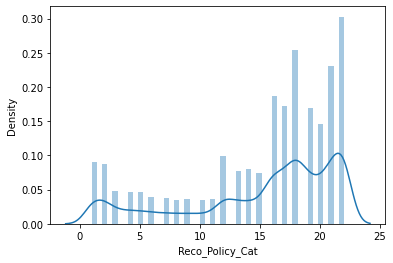

In [762]:
sns.distplot((df['Reco_Policy_Cat']))

### Reco_Policy_Premium

In [763]:
df['Reco_Policy_Premium'].value_counts()

10080.0    61
11880.0    59
12060.0    58
9296.0     56
11520.0    54
           ..
30195.2     1
26244.0     1
18892.8     1
34792.8     1
9458.4      1
Name: Reco_Policy_Premium, Length: 6977, dtype: int64

In [764]:
df['Reco_Policy_Premium'] = np.sqrt(df['Reco_Policy_Premium'])

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

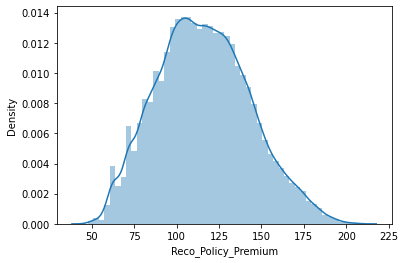

In [765]:
sns.distplot(df['Reco_Policy_Premium'])

# Modelling 

<AxesSubplot:>

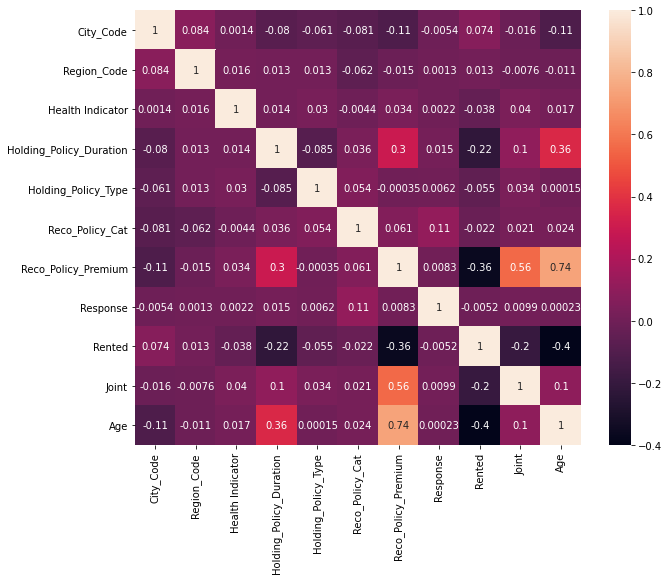

In [851]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [775]:
import statsmodels.api as sm
XX = df[['Joint', 'Is_Spouse_Yes']]
YY = df['Response']
x = sm.add_constant(XX)
mo = sm.OLS(YY, XX).fit()

In [776]:
mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.052
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              1405.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):                        0.00
Time:                        08:01:35   Log-Likelihood:                         -34518.
No. Observations:               50882   AIC:                                  6.904e+04
Df Residuals:                   50880   BIC:                                  6.906e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Joint             0.2687      0.011     24.717      0.000       0.247       0.290
Is_Spouse_Yes    -0.0251      0.012     -2.080      0.038      -0.049      -0.001
==============================================================================
Omnibus:                     7775.762   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10864.932
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       2.542   Cond. No.                         4.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Dropping the Is_Spouse_Yes column

In [778]:
df.drop(['Is_Spouse_Yes'], axis=1, inplace=True)

In [782]:
df.drop(['ID'], axis=1, inplace=True)

In [783]:
df.head()

,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age
0,3,56.683331,1,14,3,22,107.833205,0,1,0,36
1,5,33.421550,2,1,3,22,174.671120,0,0,1,48
2,5,61.090097,1,1,1,19,86.313383,1,0,0,32
3,24,66.166457,1,14,3,19,133.341666,0,0,1,50
4,8,46.797436,2,3,1,16,102.000000,0,1,0,44


<AxesSubplot:>

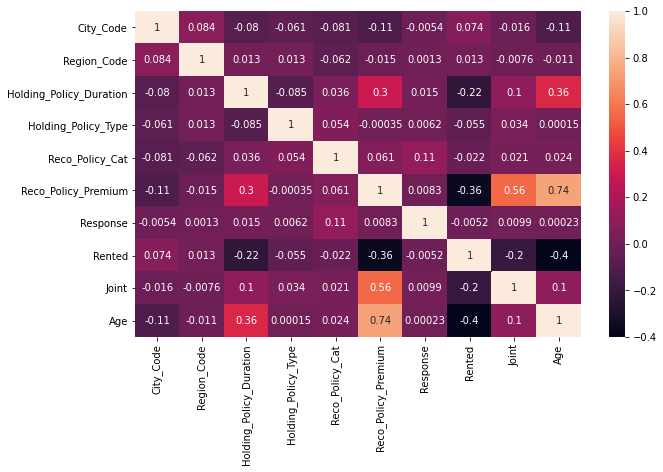

In [786]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [787]:
df.shape

(50882, 11)

In [881]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [882]:
X = df.drop(['Response'], axis=1)
y = df['Response']

In [854]:
X.head()

,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Rented,Joint,Age
0,3,56.683331,1,14,3,22,107.833205,1,0,36
1,5,33.421550,2,1,3,22,174.671120,0,1,48
2,5,61.090097,1,1,1,19,86.313383,0,0,32
3,24,66.166457,1,14,3,19,133.341666,0,1,50
4,8,46.797436,2,3,1,16,102.000000,1,0,44


In [855]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [856]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

2

In [857]:
skf

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

In [858]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    

TRAIN: [25367 25368 25369 ... 50879 50880 50881] TEST: [    0     1     2 ... 25723 25736 25740]
TRAIN: [    0     1     2 ... 25723 25736 25740] TEST: [25367 25368 25369 ... 50879 50880 50881]


In [859]:
X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

In [860]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25441, 10), (25441, 10), (25441,), (25441,))

In [861]:
y_train.value_counts()

0    19337
1     6104
Name: Response, dtype: int64

In [862]:
y_test.value_counts()

0    19336
1     6105
Name: Response, dtype: int64

In [863]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [864]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [865]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [866]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5112694826130904

In [868]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [869]:
y_pred = xgb.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5224818562685754

In [871]:
!pip install lightgbm

In [873]:
!pip install catboost


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=efbeaad2a9ae8c1c94210bee9bb190f4322d1c3841acf3f57b1dece0c46b1157
  Stored in directory: c:\users\abhishek maity\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [874]:
import lightgbm as lgb
from catboost import CatBoostClassifier

In [875]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [876]:
y_pred = clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5064748757860054

In [877]:
ctb = CatBoostClassifier()
ctb.fit(X_train, y_train)


Learning rate set to 0.04103
0:	learn: 0.6798162	total: 172ms	remaining: 2m 51s
1:	learn: 0.6672039	total: 183ms	remaining: 1m 31s
2:	learn: 0.6547363	total: 194ms	remaining: 1m 4s
3:	learn: 0.6445798	total: 205ms	remaining: 51s
4:	learn: 0.6347432	total: 216ms	remaining: 43s
5:	learn: 0.6263634	total: 227ms	remaining: 37.6s
6:	learn: 0.6187587	total: 238ms	remaining: 33.7s
7:	learn: 0.6122776	total: 244ms	remaining: 30.3s
8:	learn: 0.6055510	total: 254ms	remaining: 28s
9:	learn: 0.5997399	total: 267ms	remaining: 26.5s
10:	learn: 0.5941902	total: 278ms	remaining: 25s
11:	learn: 0.5892369	total: 288ms	remaining: 23.7s
12:	learn: 0.5848284	total: 298ms	remaining: 22.6s
13:	learn: 0.5809549	total: 308ms	remaining: 21.7s
14:	learn: 0.5773024	total: 318ms	remaining: 20.9s
15:	learn: 0.5739378	total: 329ms	remaining: 20.2s
16:	learn: 0.5709091	total: 339ms	remaining: 19.6s
17:	learn: 0.5681774	total: 349ms	remaining: 19s
18:	learn: 0.5656898	total: 358ms	remaining: 18.5s
19:	learn: 0.5632003

161:	learn: 0.5145567	total: 1.86s	remaining: 9.63s
162:	learn: 0.5143516	total: 1.88s	remaining: 9.67s
163:	learn: 0.5142895	total: 1.9s	remaining: 9.67s
164:	learn: 0.5141357	total: 1.91s	remaining: 9.65s
165:	learn: 0.5140278	total: 1.92s	remaining: 9.64s
166:	learn: 0.5139266	total: 1.93s	remaining: 9.62s
167:	learn: 0.5138601	total: 1.94s	remaining: 9.61s
168:	learn: 0.5137599	total: 1.95s	remaining: 9.59s
169:	learn: 0.5137045	total: 1.96s	remaining: 9.58s
170:	learn: 0.5136377	total: 1.97s	remaining: 9.56s
171:	learn: 0.5135143	total: 1.98s	remaining: 9.54s
172:	learn: 0.5134386	total: 1.99s	remaining: 9.52s
173:	learn: 0.5133663	total: 2s	remaining: 9.51s
174:	learn: 0.5132840	total: 2.01s	remaining: 9.49s
175:	learn: 0.5131297	total: 2.02s	remaining: 9.47s
176:	learn: 0.5130254	total: 2.03s	remaining: 9.46s
177:	learn: 0.5129235	total: 2.04s	remaining: 9.44s
178:	learn: 0.5128291	total: 2.05s	remaining: 9.42s
179:	learn: 0.5127331	total: 2.06s	remaining: 9.4s
180:	learn: 0.512

326:	learn: 0.4974804	total: 3.63s	remaining: 7.46s
327:	learn: 0.4973918	total: 3.64s	remaining: 7.45s
328:	learn: 0.4972744	total: 3.65s	remaining: 7.44s
329:	learn: 0.4972058	total: 3.66s	remaining: 7.43s
330:	learn: 0.4971009	total: 3.67s	remaining: 7.41s
331:	learn: 0.4970232	total: 3.68s	remaining: 7.4s
332:	learn: 0.4968819	total: 3.69s	remaining: 7.39s
333:	learn: 0.4967909	total: 3.7s	remaining: 7.38s
334:	learn: 0.4966493	total: 3.71s	remaining: 7.37s
335:	learn: 0.4965674	total: 3.73s	remaining: 7.37s
336:	learn: 0.4964684	total: 3.74s	remaining: 7.35s
337:	learn: 0.4964053	total: 3.75s	remaining: 7.34s
338:	learn: 0.4963141	total: 3.76s	remaining: 7.33s
339:	learn: 0.4962344	total: 3.77s	remaining: 7.32s
340:	learn: 0.4961623	total: 3.78s	remaining: 7.3s
341:	learn: 0.4960621	total: 3.79s	remaining: 7.29s
342:	learn: 0.4959356	total: 3.8s	remaining: 7.28s
343:	learn: 0.4958401	total: 3.81s	remaining: 7.27s
344:	learn: 0.4957518	total: 3.82s	remaining: 7.26s
345:	learn: 0.49

499:	learn: 0.4818033	total: 5.44s	remaining: 5.44s
500:	learn: 0.4817010	total: 5.45s	remaining: 5.43s
501:	learn: 0.4816285	total: 5.46s	remaining: 5.42s
502:	learn: 0.4815464	total: 5.48s	remaining: 5.41s
503:	learn: 0.4814883	total: 5.49s	remaining: 5.4s
504:	learn: 0.4814228	total: 5.5s	remaining: 5.39s
505:	learn: 0.4813232	total: 5.52s	remaining: 5.39s
506:	learn: 0.4812400	total: 5.53s	remaining: 5.38s
507:	learn: 0.4811549	total: 5.54s	remaining: 5.37s
508:	learn: 0.4811028	total: 5.55s	remaining: 5.36s
509:	learn: 0.4810274	total: 5.57s	remaining: 5.35s
510:	learn: 0.4809608	total: 5.58s	remaining: 5.34s
511:	learn: 0.4808577	total: 5.59s	remaining: 5.33s
512:	learn: 0.4807981	total: 5.6s	remaining: 5.32s
513:	learn: 0.4807243	total: 5.61s	remaining: 5.31s
514:	learn: 0.4806520	total: 5.62s	remaining: 5.29s
515:	learn: 0.4805701	total: 5.63s	remaining: 5.28s
516:	learn: 0.4805074	total: 5.65s	remaining: 5.28s
517:	learn: 0.4804002	total: 5.66s	remaining: 5.26s
518:	learn: 0.4

670:	learn: 0.4688144	total: 7.23s	remaining: 3.54s
671:	learn: 0.4687814	total: 7.24s	remaining: 3.53s
672:	learn: 0.4687320	total: 7.26s	remaining: 3.53s
673:	learn: 0.4686309	total: 7.27s	remaining: 3.52s
674:	learn: 0.4685625	total: 7.28s	remaining: 3.5s
675:	learn: 0.4685159	total: 7.29s	remaining: 3.49s
676:	learn: 0.4684662	total: 7.3s	remaining: 3.48s
677:	learn: 0.4683942	total: 7.31s	remaining: 3.47s
678:	learn: 0.4682967	total: 7.32s	remaining: 3.46s
679:	learn: 0.4682153	total: 7.33s	remaining: 3.45s
680:	learn: 0.4681621	total: 7.34s	remaining: 3.44s
681:	learn: 0.4680667	total: 7.34s	remaining: 3.42s
682:	learn: 0.4679967	total: 7.36s	remaining: 3.41s
683:	learn: 0.4679106	total: 7.37s	remaining: 3.4s
684:	learn: 0.4678372	total: 7.38s	remaining: 3.39s
685:	learn: 0.4677821	total: 7.38s	remaining: 3.38s
686:	learn: 0.4676876	total: 7.39s	remaining: 3.37s
687:	learn: 0.4676217	total: 7.4s	remaining: 3.36s
688:	learn: 0.4675731	total: 7.42s	remaining: 3.35s
689:	learn: 0.46

840:	learn: 0.4573421	total: 9.12s	remaining: 1.72s
841:	learn: 0.4572753	total: 9.13s	remaining: 1.71s
842:	learn: 0.4572211	total: 9.14s	remaining: 1.7s
843:	learn: 0.4571749	total: 9.15s	remaining: 1.69s
844:	learn: 0.4571251	total: 9.16s	remaining: 1.68s
845:	learn: 0.4570610	total: 9.18s	remaining: 1.67s
846:	learn: 0.4569997	total: 9.19s	remaining: 1.66s
847:	learn: 0.4569007	total: 9.2s	remaining: 1.65s
848:	learn: 0.4568613	total: 9.21s	remaining: 1.64s
849:	learn: 0.4567628	total: 9.22s	remaining: 1.63s
850:	learn: 0.4567186	total: 9.23s	remaining: 1.62s
851:	learn: 0.4566470	total: 9.24s	remaining: 1.6s
852:	learn: 0.4565850	total: 9.25s	remaining: 1.59s
853:	learn: 0.4565193	total: 9.26s	remaining: 1.58s
854:	learn: 0.4564809	total: 9.27s	remaining: 1.57s
855:	learn: 0.4564207	total: 9.28s	remaining: 1.56s
856:	learn: 0.4563810	total: 9.29s	remaining: 1.55s
857:	learn: 0.4563284	total: 9.3s	remaining: 1.54s
858:	learn: 0.4562629	total: 9.32s	remaining: 1.53s
859:	learn: 0.45

In [878]:
y_pred = ctb.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5111265047911717

In [894]:
len([1])

1

In [ ]:
for i in range(len([1]))

In [885]:
scores = []

avg_loss = []

seeds = [1]

for seed in range(len(seeds)):
    
    print(' ')
    
    print('#'*100)
    
    print('Seed',seeds[seed])

    X_train_cv,y_train_cv = X.copy(), y.copy()

    sssf = StratifiedShuffleSplit(n_splits=5, test_size = 0.20 ,random_state=seed)
    
    for i, (idxT, idxV) in enumerate(sssf.split(X_train_cv, y_train_cv)):

        print('Fold',i)

        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))

        clf = lgb.LGBMClassifier(boosting_type='gbdt',
                                 n_estimators=10000,
                                 max_depth=10,
                                 learning_rate=0.02,
                                 subsample=0.9,
                                 colsample_bytree=0.4,
                                 objective ='binary',
                                 random_state = 1,
                                 importance_type='gain',
                                 reg_alpha=2,
                                 reg_lambda=2
                                 #cat_features=cat_features
                                )        
        
        h = clf.fit(X_train_cv.iloc[idxT], y_train_cv.iloc[idxT], 
                    eval_set=[(X_train_cv.iloc[idxV],y_train_cv.iloc[idxV])],
                    verbose=100,eval_metric=['binary_logloss','auc'],
                    early_stopping_rounds=100)
        probs_oof = clf.predict_proba(X_train_cv.iloc[idxV])[:,1]
        
#         probs_lgb +=clf.predict_proba(test_df)[:,1]
        
        roc = roc_auc_score(y_train_cv.iloc[idxV],probs_oof)

        scores.append(roc)

        avg_loss.append(clf.best_score_['valid_0']['binary_logloss'])

        print ('LGB Val OOF AUC=',roc)

        print('#'*100)
        
        
print("Log Loss Stats {0:.8f},{1:.8f}".format(np.array(avg_loss).mean(), np.array(avg_loss).std()))

print('%.8f (%.8f)' % (np.array(scores).mean(), np.array(scores).std()))

 
####################################################################################################
Seed 1
Fold 0
 rows of train = 40705 rows of holdout = 10177
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.524087	valid_0's auc: 0.656881
[200]	valid_0's binary_logloss: 0.518595	valid_0's auc: 0.6647
[300]	valid_0's binary_logloss: 0.516548	valid_0's auc: 0.667208
[400]	valid_0's binary_logloss: 0.515199	valid_0's auc: 0.66928
[500]	valid_0's binary_logloss: 0.514554	valid_0's auc: 0.670052
[600]	valid_0's binary_logloss: 0.514106	valid_0's auc: 0.670546
[700]	valid_0's binary_logloss: 0.513546	valid_0's auc: 0.671642
[800]	valid_0's binary_logloss: 0.512904	valid_0's auc: 0.673075
[900]	valid_0's binary_logloss: 0.512701	valid_0's auc: 0.673307
[1000]	valid_0's binary_logloss: 0.512165	valid_0's auc: 0.674

In [889]:
scores

[0.6791075908722968,
 0.6730465612818554,
 0.6815342844754609,
 0.6728403551932965,
 0.6774718127659305]

In [892]:
np.array(scores).mean()

0.676800120917768

# Test Data

In [932]:
df2 = pd.read_csv('test_YCcRUnU.csv')

In [933]:
df2.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [934]:
def clean_data(df):
    
    df['City_Code'] = df['City_Code'].str.split('C', expand=True)[1]
    df['City_Code'] = df['City_Code'].astype(int)
    df['Region_Code']=np.sqrt(df['Region_Code'])
    df = pd.concat([df, pd.get_dummies(df['Accomodation_Type'], drop_first=True) ], axis=1)
    df = df.drop(['Accomodation_Type'], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Reco_Insurance_Type'], drop_first=True)], axis=1)
    df.drop(['Reco_Insurance_Type'],axis=1, inplace=True)
    df['Age'] = (df['Upper_Age'] + df['Lower_Age'])//2
    df.drop(['Upper_Age','Lower_Age'], axis=1, inplace=True)
    df = pd.concat([df, pd.get_dummies(df['Is_Spouse'], drop_first=True)], axis=1)
    df.rename(columns={'Yes' : 'Is_Spouse_Yes'}, inplace=True)
    df.drop(['Is_Spouse'], axis=1, inplace=True)
    
    df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace=True)
    df['Health Indicator'] = df['Health Indicator'].str.split('X',expand=True)[1]
    df['Health Indicator'] = df['Health Indicator'].astype(int)
    
    df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace=True)
    df['Holding_Policy_Duration'].replace({'14+' : 14.0}, inplace=True)
    df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'],downcast='integer')
    df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(int)
    
    df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0], inplace=True)
    df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype(int)
    
    df['Reco_Policy_Premium'] = np.sqrt(df['Reco_Policy_Premium'])
    df.drop(['Is_Spouse_Yes','ID'], axis=1, inplace=True)
    X = df
    
    return X
    

In [935]:
X = clean_data(df2)

In [936]:
X

,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Rented,Joint,Age
0,1,12.489996,1,6,3,5,109.242849,0,0,30
1,4,2.645751,1,3,3,18,179.456959,0,1,68
2,1,23.748684,3,2,4,17,96.124919,1,0,28
3,3,34.307434,3,3,3,18,95.320512,1,0,23
4,1,30.838288,3,14,3,5,150.113291,0,0,75
...,...,...,...,...,...,...,...,...,...,...
21800,3,32.310989,1,4,1,18,126.031742,0,0,45
21801,4,16.309506,5,6,3,18,146.253205,0,0,59
21802,12,49.699095,3,14,3,1,133.551488,0,0,74
21803,10,40.938979,4,3,1,19,107.554637,1,0,25


In [937]:
X.shape

(21805, 10)

In [948]:
ans = clf.predict(X)

In [949]:
ans

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [951]:
ans.shape

(21805,)

In [952]:
df3.shape

(21805, 2)

In [953]:
df3.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [954]:
df3['Response'] = ans

In [957]:
df3['Response'].value_counts()

0    21373
1      432
Name: Response, dtype: int64

In [976]:
df3['Response']= ans

In [978]:
df3.to_csv('firstsubmission.csv')

In [980]:
ff = pd.read_csv('firstsubmissionlightgbm.csv')
ff['Response'].value_counts()

0    21373
1      432
Name: Response, dtype: int64

In [826]:
df.head()

,City_Code,Region_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Age
0,3,56.683331,1,14,3,22,107.833205,0,1,0,36
1,5,33.421550,2,1,3,22,174.671120,0,0,1,48
2,5,61.090097,1,1,1,19,86.313383,1,0,0,32
3,24,66.166457,1,14,3,19,133.341666,0,0,1,50
4,8,46.797436,2,3,1,16,102.000000,0,1,0,44


In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [546]:
X_train.shape, X_test.shape

((40705, 12), (10177, 12))

In [549]:
X_train.columns.tolist()

['City_Code',
 'Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Rented',
 'Joint',
 'Is_Spouse_Yes']

In [550]:
X_test.columns.tolist()

['City_Code',
 'Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Rented',
 'Joint',
 'Is_Spouse_Yes']

In [827]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [583]:
rm = RandomForestClassifier()
rm.fit(X_train, y_train)

RandomForestClassifier()

In [584]:
res = rm.predict(X_test)

In [585]:
res

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [592]:
from sklearn.metrics import roc_auc_score
a = roc_auc_score(y_test, res)

In [593]:
a

0.5094831932720411

In [588]:
X_train['Health Indicator'].value_counts()

1    19730
2     8248
3     5430
4     4598
5     1399
6     1026
7      159
8       66
9       49
Name: Health Indicator, dtype: int64

In [594]:
model = XGBClassifier()

In [595]:
X_train['Health Indicator'] = X_train['Health Indicator'].astype(int)
X_test['Health Indicator'] = X_test['Health Indicator'].astype(int)

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [597]:
X_train.dtypes

City_Code                    int32
Region_Code                  int64
Upper_Age                    int64
Lower_Age                    int64
Health Indicator             int32
Holding_Policy_Duration       int8
Holding_Policy_Type           int8
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Rented                       uint8
Joint                        uint8
Is_Spouse_Yes                uint8
dtype: object

In [598]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [579]:
y_pred = model.predict(X_test)

In [599]:
b = roc_auc_score(y_test, y_pred)

In [600]:
b

0.5217991159018517

<AxesSubplot:>

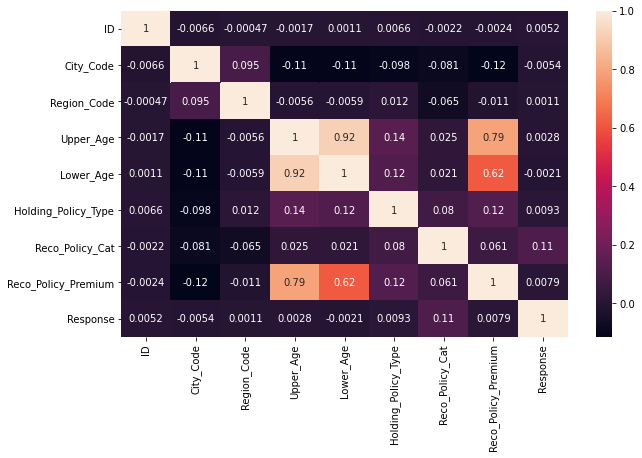

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [162]:
df[['Holding_Policy_Duration', 'Holding_Policy_Duration']].isnull().sum()

Holding_Policy_Duration    20251
Holding_Policy_Duration    20251
dtype: int64

In [177]:
df['Holding_Policy_Type'].value_counts()

Missing    20251
3.0        13279
1.0         8173
2.0         5005
4.0         4174
Name: Holding_Policy_Type, dtype: int64

In [176]:
df['Holding_Policy_Duration'].value_counts()

Missing    20251
1.0         4499
14+         4335
2.0         4260
3.0         3586
4.0         2771
5.0         2362
6.0         1894
7.0         1645
8.0         1316
9.0         1114
10.0         813
11.0         546
12.0         513
13.0         511
14.0         466
Name: Holding_Policy_Duration, dtype: int64

In [169]:
df['Holding_Policy_Duration'].fillna('Missing', inplace=True)
df['Holding_Policy_Type'].fillna('Missing', inplace=True)

In [175]:
###### if Holding_Policy_Duration is missing then Holding_Policy_Type is also missing

df[df['Holding_Policy_Duration'] == 'Missing']['Holding_Policy_Type'].value_counts()

Missing    20251
Name: Holding_Policy_Type, dtype: int64

In [142]:
df[['Upper_Age', 'Lower_Age', 'Health Indicator' ]]

,Upper_Age,Lower_Age,Health Indicator
0,36,36,X1
1,75,22,X2
2,32,32,NaN
3,52,48,X1
4,44,44,X2
...,...,...,...
50877,22,22,X3
50878,27,27,X3
50879,63,63,X2
50880,71,49,X2


In [160]:
df.groupby(['Health Indicator'])['Health Indicator'].value_counts()

Health Indicator  Health Indicator
X1                X1                  13010
X2                X2                  10332
X3                X3                   6762
X4                X4                   5743
X5                X5                   1727
X6                X6                   1280
X7                X7                    196
X8                X8                     78
X9                X9                     63
Name: Health Indicator, dtype: int64

In [137]:
df['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [112]:
df['Region_Code'].nunique()

5316

In [12]:
df.shape

(50882, 14)

In [13]:
50882*14

712348

<AxesSubplot:xlabel='Response', ylabel='count'>

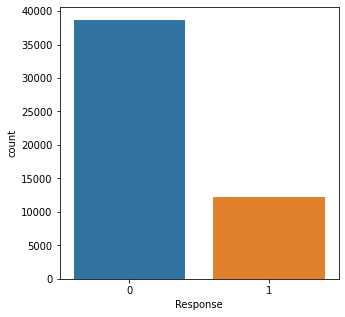

In [80]:
plt.figure(figsize=(5,5))
sns.countplot(x='Response', data=df)

In [72]:
df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [70]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [71]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [141]:
df['Health Indicator'].isnull().sum()

11691

In [59]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [50]:
df['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [47]:
df['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [136]:
df.groupby(['Accomodation_Type'])['Reco_Insurance_Type'].value_counts()

Accomodation_Type  Reco_Insurance_Type
Owned              Individual             20262
                   Joint                   7689
Rented             Individual             20274
                   Joint                   2657
Name: Reco_Insurance_Type, dtype: int64

In [105]:
df['City_Code'] = df['City_Code'].str.split('C', expand=True).iloc[:,1].astype(int) #.value_counts().index #[0].split('C')[1]

In [107]:
df['City_Code']

0         3
1         5
2         5
3        24
4         8
         ..
50877     4
50878     5
50879     1
50880     1
50881     3
Name: City_Code, Length: 50882, dtype: int32

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
City_Code,50882.0,8.140167,7.885429,1.0,2.00,5.0,13.00,36.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [8]:
df.shape

(50882, 14)

In [7]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [10]:
np.round(df.isnull().mean(),2)

ID                         0.00
City_Code                  0.00
Region_Code                0.00
Accomodation_Type          0.00
Reco_Insurance_Type        0.00
Upper_Age                  0.00
Lower_Age                  0.00
Is_Spouse                  0.00
Health Indicator           0.23
Holding_Policy_Duration    0.40
Holding_Policy_Type        0.40
Reco_Policy_Cat            0.00
Reco_Policy_Premium        0.00
Response                   0.00
dtype: float64

In [61]:
df3 = pd.read_csv('sample_submission_QrCyCoT.csv')
df3.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [69]:
df3['Response'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)